# Actividad 2: CNN classifier for Fashion MNIST dataset

## **Jessica Nicole Copado Leal A01637876**

You will use the Fashion MNIST Dataset. Build a convolutional model to reach at least 90% of accuracy for this dataset.

### Make a description about the dataset:
  * What is the dataset about?

  70,000 photos total: 60,000 for training and 10,000 for testing, make up the fashion training set. A 28x28 grayscale picture from the dataset sample is linked to a label from one of ten classes.


  * Also describe the following characteristics: number of classes, number of samples, how the samples are split, sample size, value type.

  These are the 10 classes:

    0. T-shirt or top
    1. Trouser 
    2. Pullover 
    3. Dress 
    4. Coat 
    5. Sandal
    6. Shirt
    7. Sneaker
    8. Bag 
    9. Ankle boot

  Each picture has a height of 28 pixels and a width of 28 pixels for a total of 784 pixels. Each pixel has a single pixel value that describes its brightness or darkness, with larger numbers representing darker pixels. The integer for this pixel value ranges from 0 to 255.

  The first column consists of the class labels, and represents the article of clothing. The rest of 784 columns (1-785) contain the pixel-values of the associated image.

In [1]:
# import libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import random
import keras
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Build CNN model using tensorflow and Keras API. Define hyperparameters:
* Number of Convolutional Layers
* Kernel Size
* Strides
* Function Activation
* Outputs

In [2]:
cnn_model = Sequential()

# 32 filters
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.2))

# 64 filters
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten()) # transforms the format of the images from a two-dimensional array to a one-dimensional array
cnn_model.add(Dense(units=128, activation='relu')) # layer has 128 nodes (or neurons)
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(units=10, activation='softmax')) # 10-node softmax layer that returns an array of 10 probability scores that sum to 1

### Print the model summary
* Identify how many learnable parameters does the model have? 
  There are 468,202 trainable parameters
* How many correspond to the convolutional layers?
  64,992
* How many on the FC parameters?
  402,826
* Are there no-trainable parameters and why?
  384

In [36]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                        

### Compile the model
* Use any optimizer (ADAM, RMprop, SGD). ADAM is a really good optimized because it barely uses resources, and it takes advantage of the computer's power.
* Define a learning rate
* Set the following metrics: Sparse categorical accuracy and Mean Absolute Error.

In [3]:
'''
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
'''

cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics=[tf.keras.metrics.SparseCategoricalAccuracy(), tf.keras.metrics.MeanAbsoluteError()])

### Load the data
* Define whether any preprocessing of the data is necessary (e.g. scaling or normalizing).
* Define labels
* Plot an image by each label

In [4]:
# create dataframes
fashion_train = pd.read_csv('/content/drive/MyDrive/IA/IA2/fashion-mnist_train.csv',sep=',')
fashion_test = pd.read_csv('/content/drive/MyDrive/IA/IA2/fashion-mnist_test.csv', sep = ',')

In [5]:
# first five in train dataset
fashion_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# last five in train dataset
fashion_train.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# first five in test dataset
fashion_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# last five in test dataset
fashion_test.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [9]:
# get dimensions
fashion_train.shape

(60000, 785)

In [10]:
# create training and testing arrays
train = np.array(fashion_train, dtype='float32')
test = np.array(fashion_test, dtype='float32')

In [11]:
train.shape

(60000, 785)

In [12]:
train

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
test

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Text(0.5, 1.0, 'T_shirt/top')

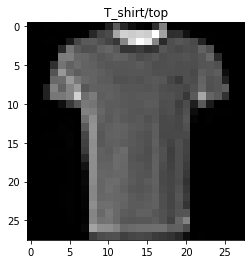

In [14]:
# create class names

# These are the 10 classes:
# 0. T-shirt or top
# 1. Trouser 
# 2. Pullover 
# 3. Dress 
# 4. Coat 
# 5. Sandal
# 6. Shirt
# 7. Sneaker
# 8. Bag 
# 9. Ankle boot

class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# view random image
i = random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow(train[i,1:].reshape((28,28))) # reshape and plot the image
plt.imshow(train[i,1:].reshape((28,28)) , cmap = 'gray') # reshape and plot the image
label_index = fashion_train["label"][i]
plt.title(f"{class_names[label_index]}")

In [15]:
label = train[i,0]
label

0.0

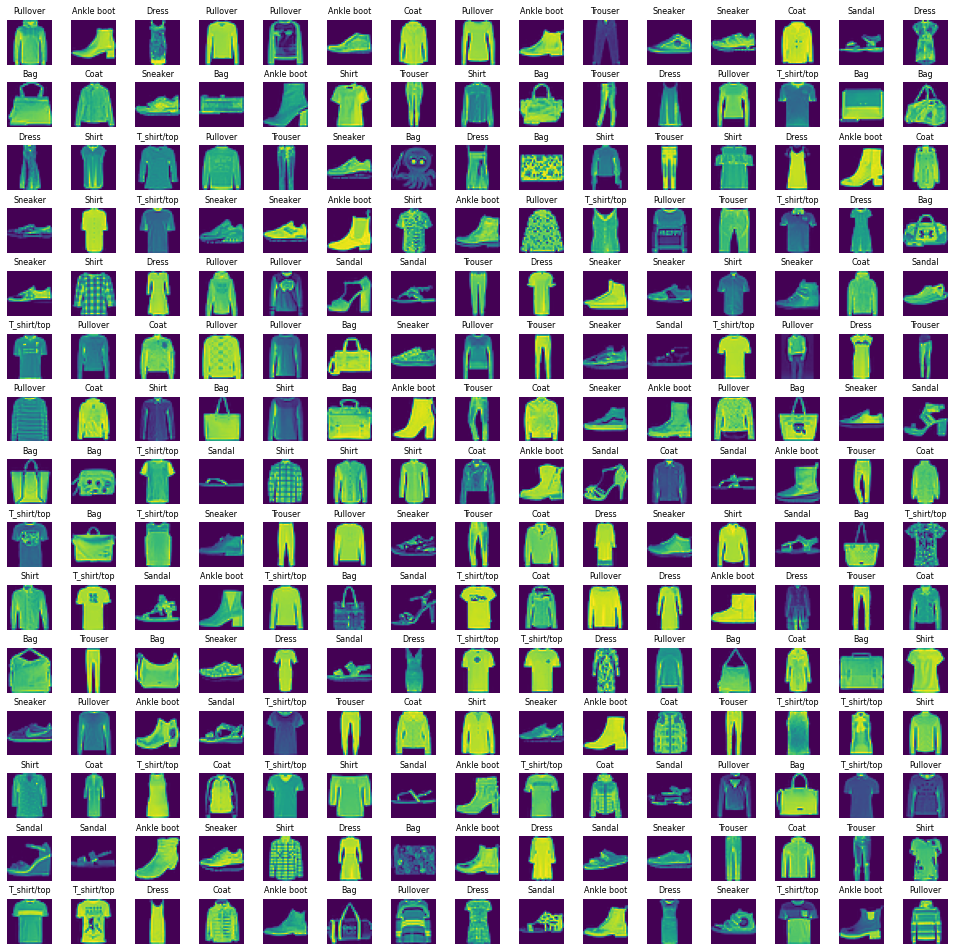

In [16]:
# view more images in grid format

# define the dimensions of the plot grid 
w_grid = 15
l_grid = 15

# subplot return the figure object and axes object
fig, axes = plt.subplots(l_grid, w_grid, figsize=(17,17))
axes = axes.ravel()
n_train = len(train)

# select a random number from 0 to n_train
for i in np.arange(0, w_grid * l_grid):

    # select a random number
    index = np.random.randint(0, n_train)
    
    # read and display an image with the selected index    
    axes[i].imshow( train[index,1:].reshape((28,28)) )
    label_index = int(train[index,0])
    axes[i].set_title(class_names[label_index], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

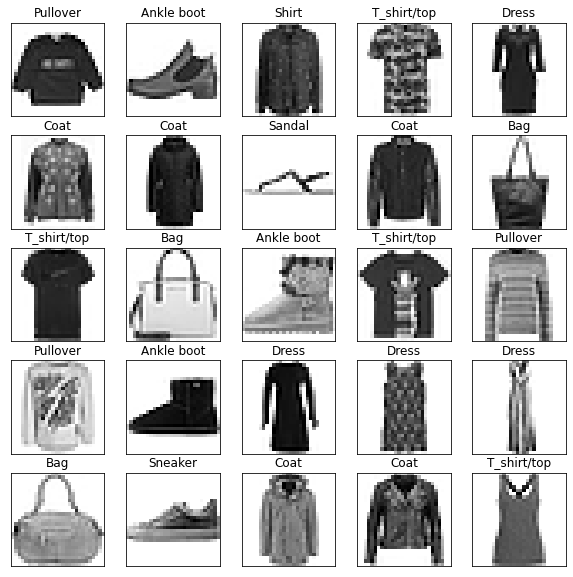

<Figure size 432x288 with 0 Axes>

In [17]:
# scaling values to a range of 0 to 1 (we divide the values by 255)

# prepare the training and testing dataset 
X_train = train[:, 1:]/255
y_train = train[:, 0]

X_test = test[:, 1:]/255
y_test = test[:,0]

# verifying that data is correct to build and train network (printing 25 images)
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
    
plt.show()
plt.tight_layout()

Text(0.5, 1.0, 'Class distribution in testing set')

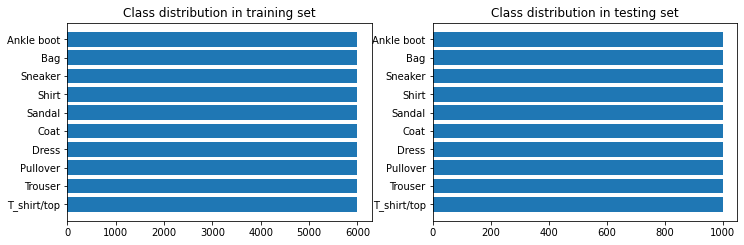

In [18]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
classes, counts = np.unique(y_train, return_counts=True)
plt.barh(class_names, counts)
plt.title('Class distribution in training set')

plt.subplot(2, 2, 2)
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(class_names, counts)
plt.title('Class distribution in testing set')

### Training model

In [19]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [20]:
print(X_train.shape)
print(y_train.shape)

(48000, 784)
(48000,)


In [21]:
# tuple
X_train = X_train.reshape(X_train.shape[0], * (28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], * (28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], * (28, 28, 1))

In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)
print(y_validate.shape)

(48000, 28, 28, 1)
(48000,)
(12000, 28, 28, 1)
(12000,)


### Fitting the model
* Define batch size and epochs
* Print the fitting history
* Plot the loss vs epochs
* Make a plot by each metric vs epochs

In [23]:
epochs = 5
batch_size = 128

history = cnn_model.fit(
    X_train, y_train, 
    batch_size=batch_size, 
    epochs=epochs,
    verbose=1, 
    validation_data=(X_validate, y_validate)
)

Epoch 1/5
375/375 [==============================] - 260s 691ms/step - loss: 0.4982 - sparse_categorical_accuracy: 0.8222 - mean_absolute_error: 4.4229 - val_loss: 1.4006 - val_sparse_categorical_accuracy: 0.5997 - val_mean_absolute_error: 4.4083
Epoch 2/5
375/375 [==============================] - 234s 625ms/step - loss: 0.3110 - sparse_categorical_accuracy: 0.8869 - mean_absolute_error: 4.4229 - val_loss: 0.2632 - val_sparse_categorical_accuracy: 0.9007 - val_mean_absolute_error: 4.4083
Epoch 3/5
375/375 [==============================] - 238s 634ms/step - loss: 0.2630 - sparse_categorical_accuracy: 0.9038 - mean_absolute_error: 4.4229 - val_loss: 0.2283 - val_sparse_categorical_accuracy: 0.9168 - val_mean_absolute_error: 4.4083
Epoch 4/5
375/375 [==============================] - 234s 625ms/step - loss: 0.2359 - sparse_categorical_accuracy: 0.9141 - mean_absolute_error: 4.4229 - val_loss: 0.2596 - val_sparse_categorical_accuracy: 0.8978 - val_mean_absolute_error: 4.4083
Epoch 5/5
37

In [24]:
# print keys
print(history.history.keys())

dict_keys(['loss', 'sparse_categorical_accuracy', 'mean_absolute_error', 'val_loss', 'val_sparse_categorical_accuracy', 'val_mean_absolute_error'])


Text(0.5, 1.0, 'Loss evolution')

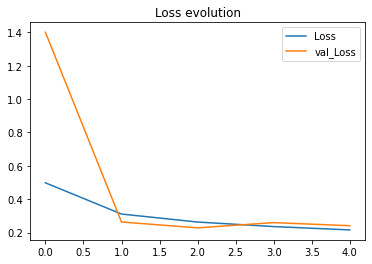

In [25]:
# create plots

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

Text(0.5, 1.0, 'Sparse categorical accuracy evolution')

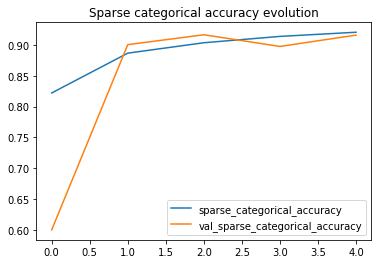

In [26]:
plt.plot(history.history['sparse_categorical_accuracy'], label='sparse_categorical_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_sparse_categorical_accuracy')
plt.legend()
plt.title('Sparse categorical accuracy evolution')

Text(0.5, 1.0, 'Mean Absolute Error evolution')

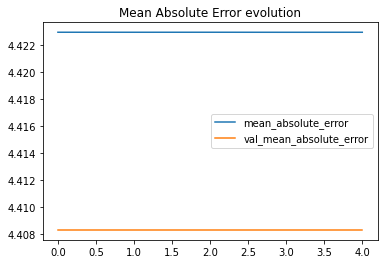

In [27]:
plt.plot(history.history['mean_absolute_error'], label='mean_absolute_error')
plt.plot(history.history['val_mean_absolute_error'], label='val_mean_absolute_error')
plt.legend()
plt.title('Mean Absolute Error evolution')

### Make the evaluate and predicts methods
* Evaluate the model on the test set
* Print loss and metrics
* Make prediction from the model 
* Print the test image
* Run the prediction
* Print the predictions
* Plot the predictions

In [28]:
# evaluate model
evaluation = cnn_model.evaluate(X_test, y_test)
print(f'Test Accuracy : {evaluation[1]:.3f}')

313/313 [==============================] - 11s 35ms/step - loss: 0.2281 - sparse_categorical_accuracy: 0.9157 - mean_absolute_error: 4.4200
Test Accuracy : 0.916


In [29]:
# get the predictions for the test data
predicted_classes = cnn_model.predict(X_test)
predicted_classes = np.argmax(predicted_classes, axis=1)

313/313 [==============================] - 11s 35ms/step


In [30]:
# first prediction
test_img = X_test[0]
prediction = cnn_model.predict(X_test)
prediction[0]

313/313 [==============================] - 11s 34ms/step


array([9.9604595e-01, 1.1293113e-12, 7.0786329e-05, 5.3079675e-06,
       6.1791326e-08, 2.5399317e-13, 3.8775508e-03, 9.5222885e-11,
       1.0932815e-07, 1.7510343e-12], dtype=float32)

In [31]:
# highest confidence value
np.argmax(prediction[0])

0

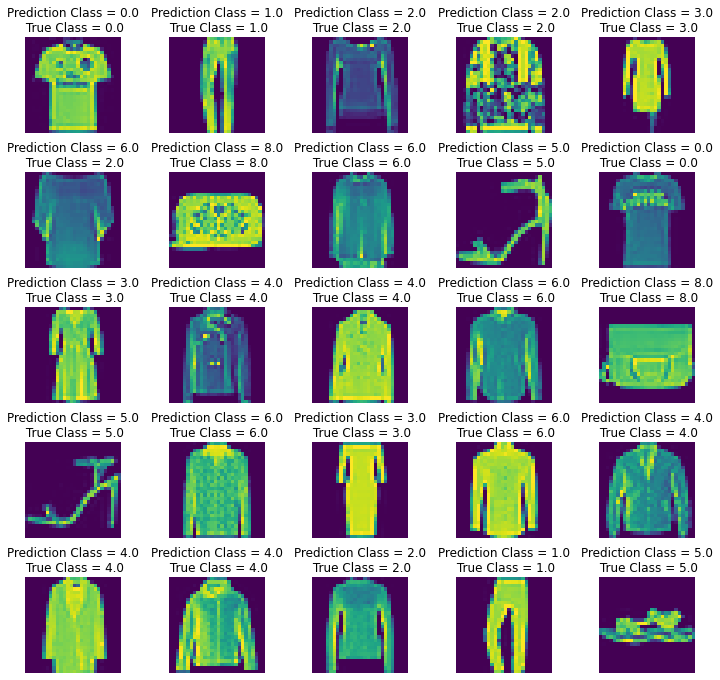

In [32]:
# test label shows classification is correct
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {(predicted_classes[i]):0.1f}\n True Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

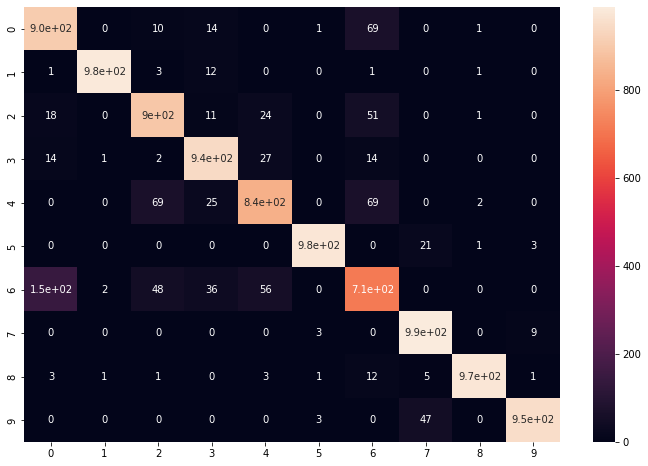

In [33]:
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (12,8))
sns.heatmap(cm, annot=True)

In [34]:
num_classes = 10
target_names = [f"Class {i}" for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.83      0.91      0.87      1000
     Class 1       1.00      0.98      0.99      1000
     Class 2       0.87      0.90      0.88      1000
     Class 3       0.91      0.94      0.92      1000
     Class 4       0.88      0.83      0.86      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.77      0.71      0.74      1000
     Class 7       0.93      0.99      0.96      1000
     Class 8       0.99      0.97      0.98      1000
     Class 9       0.99      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



### Conclusions
* About hyperparameters, how do they affect the model performance?
  Hyperparameters affect how accurate the model will be, and how precise the predictions will be.

* Which hyperparameter would you modify to improve the model?
  The number of Convolutional Layers.

* What else could you do to improve the performance of the model?
  I could use different metrics to see the accuracy and loss more precisely, and make better predictions.